In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import cufflinks as cf

In [2]:
df_train=pd.read_csv("Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test=pd.read_csv("Titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

3.Explore data distributions using histograms and box plots.

4.Visualize relationships between features and survival using scatter plots and bar plots.

In [5]:
train_data_num_col = df_train.select_dtypes(exclude=['object']).columns
train_data_num = df_train[train_data_num_col]

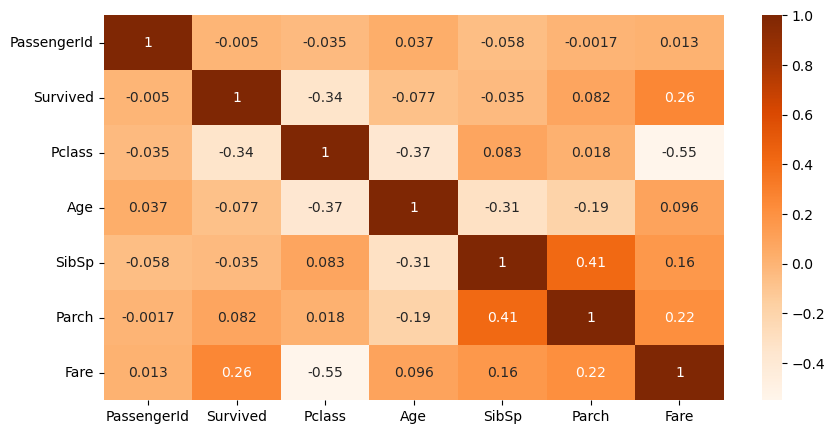

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='Oranges');

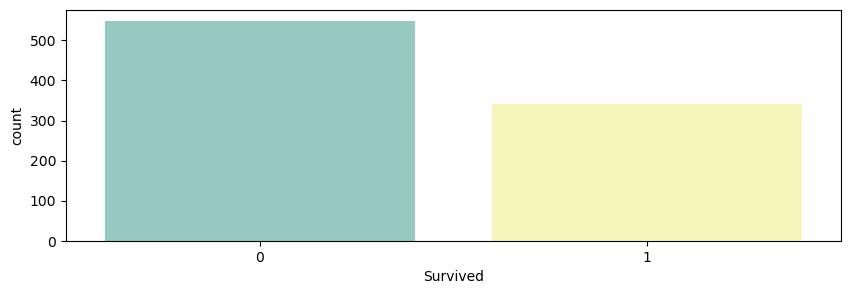

In [7]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=df_train, palette="Set3")
plt.show()

# the no. of person survived are less as compared to people which didnt survive

the no. of person survived are less as compared to people which didnt survive

Survival based on sex

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

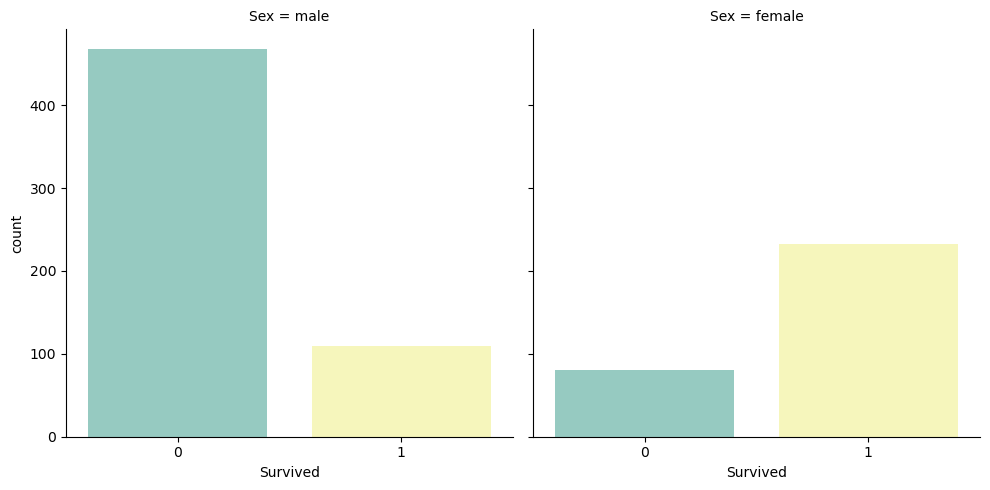

In [8]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train,palette="Set3");
plt.show()

Survival based on Pclass - Passenger Class

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

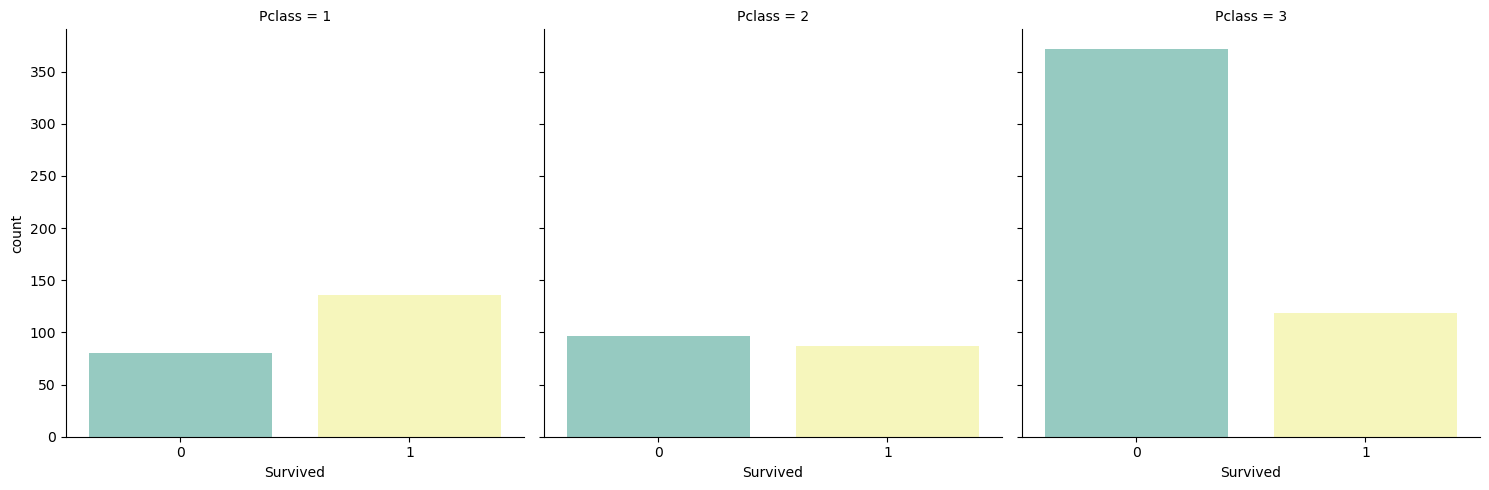

In [9]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train,palette="Set3");
plt.show()


Survival based on Pclass and Sex

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

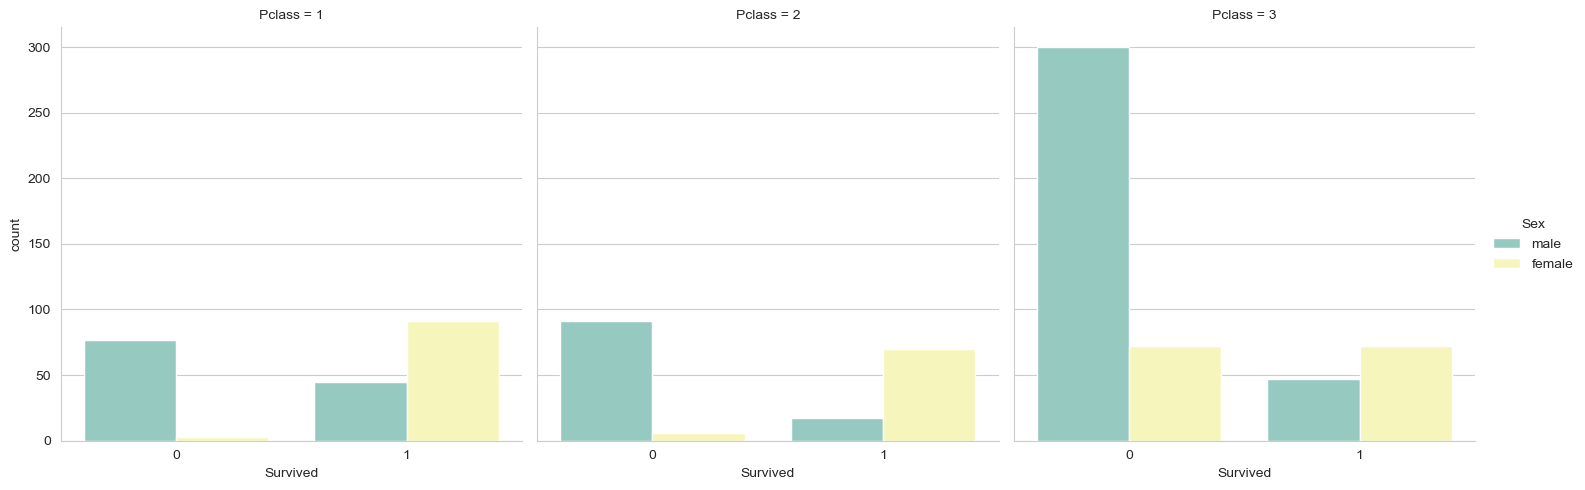

In [10]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=df_train,palette="Set3");
plt.show()

above plot states that Pclass- 3 The majority of male and half of female did not survive PClass 2 & 1 Almost all who didnt survive are male

Survival based on Embarked

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

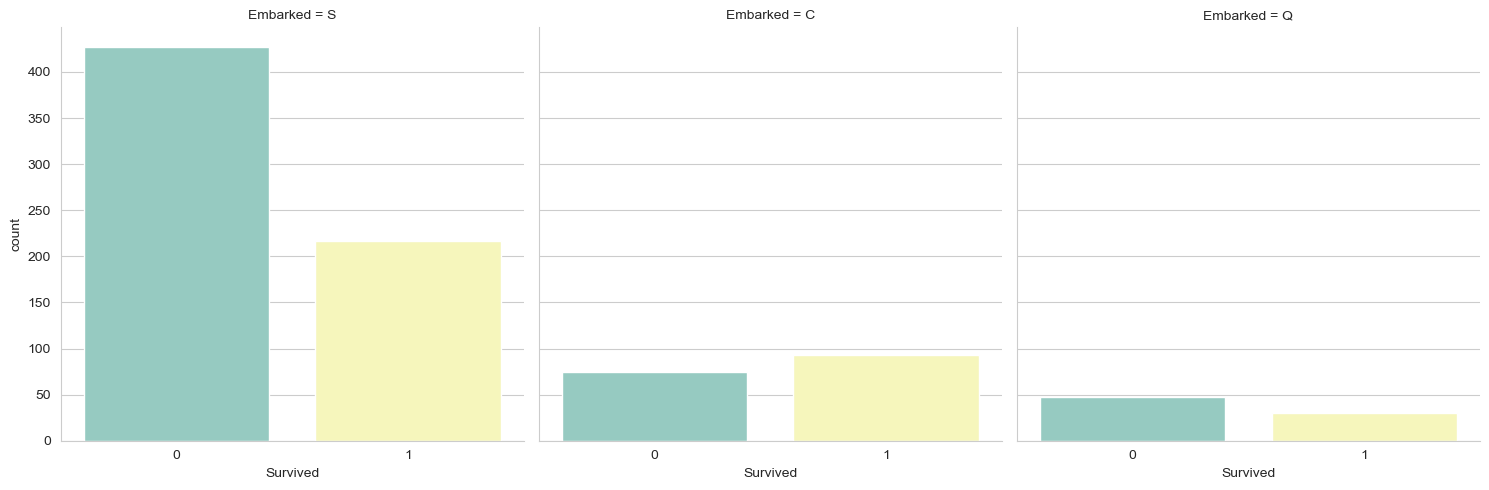

In [11]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train,palette="Set3");
plt.show()

Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

Survival based on Embarked and Pclass

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

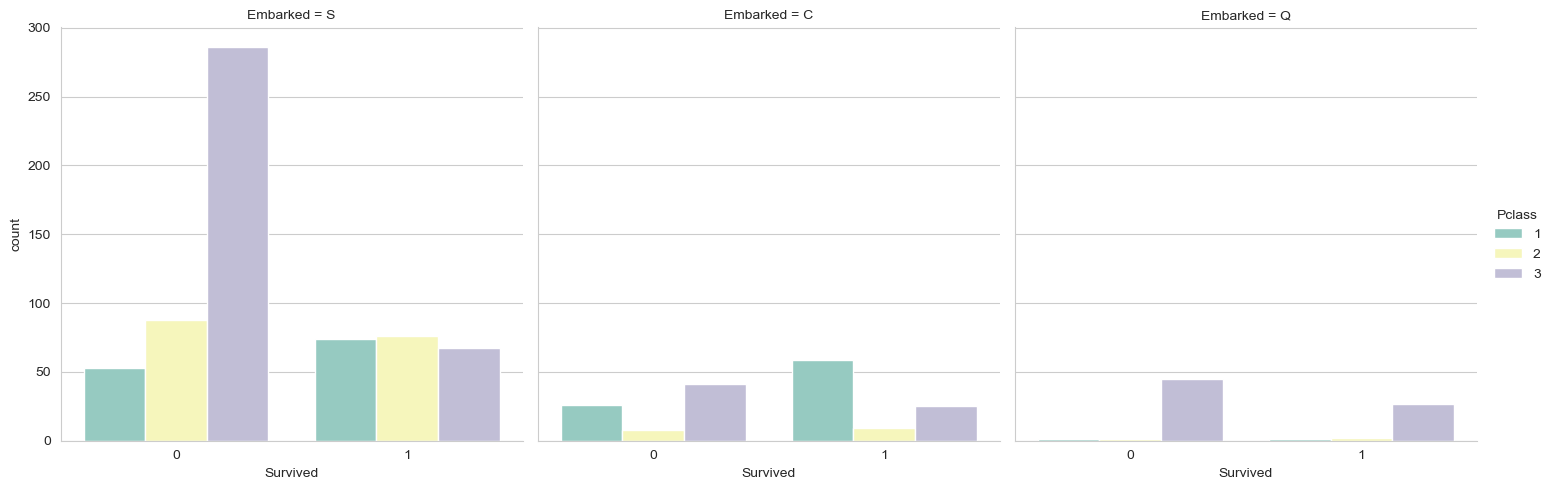

In [12]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df_train,palette="Set3");
plt.show()

Embarked S - Majority of people died belong to PClass 3. Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less. Embarked Q - Here Pclass 3 only have death rate.

Survival based on Fare

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



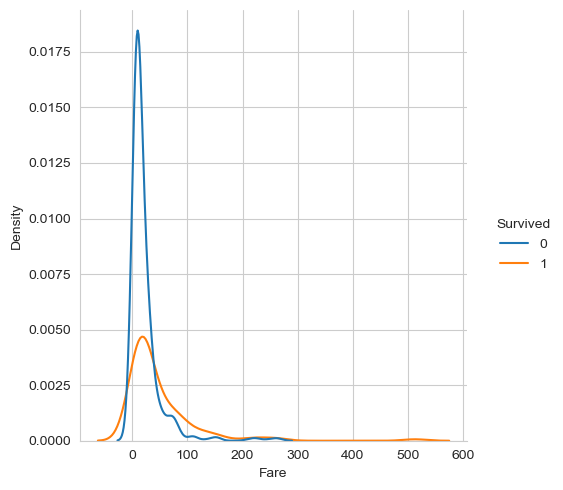

In [13]:
sns.displot(data=df_train, x="Fare",hue='Survived',kind ='kde')

Survival based on Sex

In [14]:
pd.crosstab(df_train.Sex,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Out of total females traveled 74.2% of them could survive but only 18.9% of total male traveled could survive

Survival based on Pclass

In [15]:
pd.crosstab(df_train.Pclass,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Statistical analysis of survival based on Pclass shows, 62.96% of PClass 1 could survive, and 47.28% of Pclass2 could survive and 24.24% of PClass3 could survive

Survival based on Embarked

In [18]:
pd.crosstab(df_train.Embarked,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel1')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Statistical analysis of survival based on Embarked shows, 55.36% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33.7% of Embarked s could survive.

Visual Representation of feature

Visual representation of age

<Axes: xlabel='Age', ylabel='Count'>

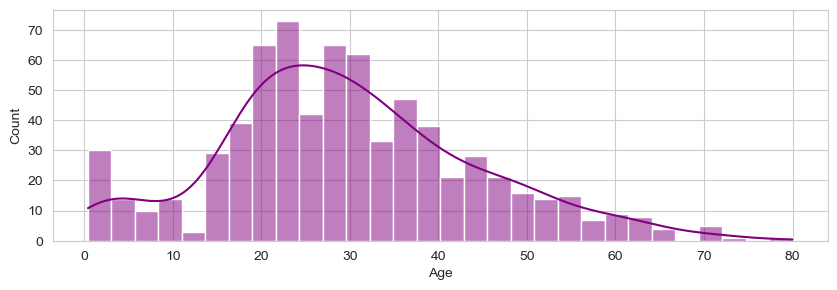

In [19]:
plt.figure(figsize=(10, 3))
sns.histplot(df_train['Age'].dropna(),kde=True,color='purple',bins=30)

Age distribution visualisation, clearly shows skew towards younger passengers.

If more details of age group is to be seen, we can use cufflinks.

In [20]:
cf.go_offline()
df_train['Age'].iplot(kind='hist',bins=35)

From cufflinks visualisation, it is much more clear about passenger age distribution. The passgeners are more likely to belong to age group grom 18-33 and there are quite few infant passengers from 0-2. cufflinks visualisation allows to create an interactive plot, like can magnify, zoom in zoom out and much more options.

Visualisation of SibSp (Siblings/Spouses )

<Axes: xlabel='SibSp', ylabel='count'>

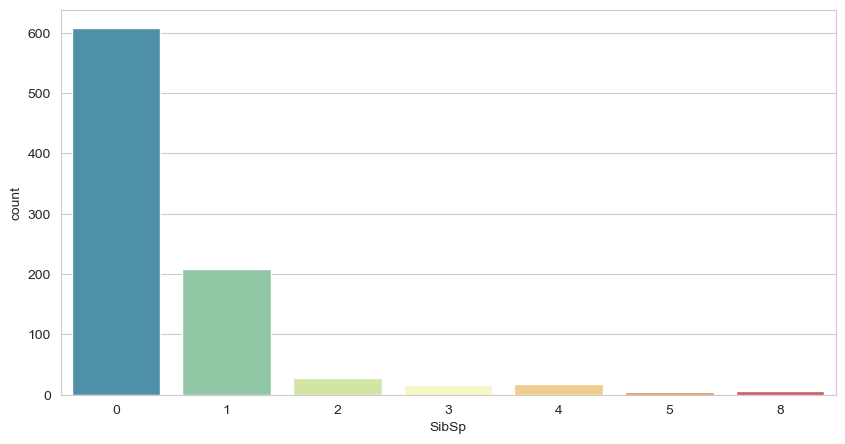

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=df_train, palette='Spectral_r')

The above visualisation clearly states most of the people travelled did not have sibling or spouse

Visualisation of Parch feature

<Axes: xlabel='Parch', ylabel='count'>

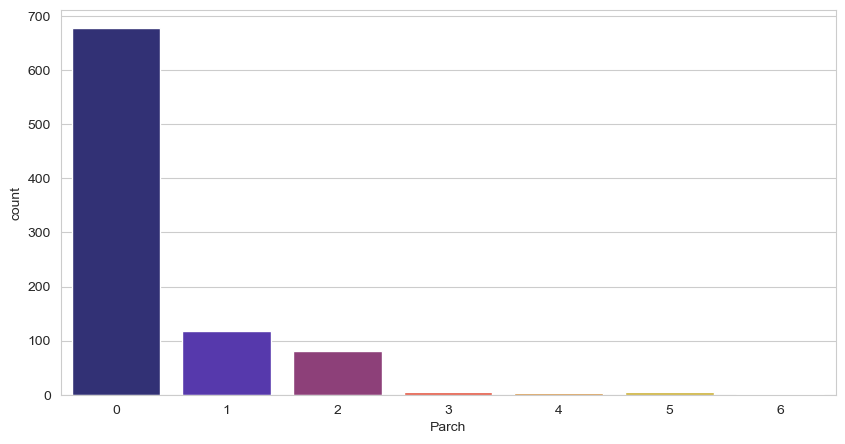

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',data=df_train,palette='CMRmap')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

Joint plot of SibSp and Parch As Visual representation of SibSp and Parch shows there majority where single passengers, so we can use a joint map to check the distribution.

In [23]:
3D Visualisation of a person with features Name,Sex and Age

SyntaxError: invalid decimal literal (3323768228.py, line 1)

In [ ]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(df_train, x='Name', y='Sex', z='Age', color='Age')
fig.show()

2. Data Preprocessing:

a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
c. check duplicates

In [24]:
df_train.duplicated().any()

False

In [25]:
df_test.duplicated().any()

False

In [26]:
df_train.isnull().sum()

# AGe , Cabin, Embarked have missing values   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# mean encoding for age column because the distribution is normal and it has no outliers

mean_age = df_train['Age'].mean()


In [28]:
#  Fill missing values in the Age column with the mean age
df_train['Age'].fillna(mean_age, inplace=True)

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# mode imputation for embarked column
#'C' for Cherbourg, 'Q' for Queenstown, and 'S' for Southampton

mode_embarked = df_train['Embarked'].mode()[0]

In [31]:
df_train['Embarked'].fillna(mode_embarked, inplace=True)

In [32]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

lets do same for test data

In [33]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
#mean imputation for Age column

mean_age_test = df_test['Age'].mean()

In [35]:
df_test['Age'].fillna(mean_age_test, inplace=True)

In [36]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
# mean imputation for Fare column
mean_fare_test = df_test['Fare'].mean()
df_test['Fare'].fillna(mean_fare_test, inplace=True)

In [38]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [39]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Dropping Cabin and PassengerId column from train and test data because it is useless and cabins are represented as C85, C123 etc

In [40]:
df_train.drop(columns=['Cabin', 'PassengerId'], inplace=True)

In [41]:
df_test.drop(columns=['Cabin', 'PassengerId'], inplace=True)

Encoding Categorical Features

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


From train_data.info(), it is clear that we have 4 categorical variables in our dataset. They are Name, Sex, Ticket and Embarked.

Features Name and Ticket will have no significant meaning for determining target, so we can drop those two from train and test data. Where as Sex and Embarked feautres will have to be encoded before builiding model.

In [43]:
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

dropping Name and Ticket from Test data

In [44]:
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

Combining dataset (i.e Train and Test data)

In [45]:
df = pd.concat([df_train, df_test], axis=0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.00000,1,0,7.2500,S
1,1.0,1,female,38.00000,1,0,71.2833,C
2,1.0,3,female,26.00000,0,0,7.9250,S
3,1.0,1,female,35.00000,1,0,53.1000,S
4,0.0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,NaN,3,male,30.27259,0,0,8.0500,S
414,NaN,1,female,39.00000,0,0,108.9000,C
415,NaN,3,male,38.50000,0,0,7.2500,S
416,NaN,3,male,30.27259,0,0,8.0500,S


Label Encoding categorical features like AGE and Embarked

In [46]:


label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

In [47]:
# Fit and transform the 'Sex' column

df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

In [48]:
# Fit and transform the 'Embarked' column

df['Embarked'] = label_encoder_embarked.fit_transform(df['Embarked'])

In [49]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,2
1,1.0,1,0,38.000000,1,0,71.2833,0
2,1.0,3,0,26.000000,0,0,7.9250,2
3,1.0,1,0,35.000000,1,0,53.1000,2
4,0.0,3,1,35.000000,0,0,8.0500,2
5,0.0,3,1,29.699118,0,0,8.4583,1
6,0.0,1,1,54.000000,0,0,51.8625,2
7,0.0,3,1,2.000000,3,1,21.0750,2
8,1.0,3,0,27.000000,0,2,11.1333,2
9,1.0,2,0,14.000000,1,0,30.0708,0


3. Model Building:

Train and Test Split

In [50]:
X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [51]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [52]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

Mode imputation on Y because its has nan values

In [53]:
y = y.fillna(y.mode()[0])

In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Choose Evaluation Metrics

In [55]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Build Predictive Models Using LightGBM and XGBoost

In [56]:
# Initialize the models
lgb_model = lgb.LGBMClassifier(n_estimators= 100)
xgb_model = xgb.XGBClassifier(loss='log_loss',n_estimators=100,random_state=48)


In [57]:
# Train the LightGBM model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


LGBMClassifier()

In [58]:

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:58:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, loss='log_loss',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

 Evaluate the Models

In [59]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)



In [60]:
# Evaluate LightGBM model
print("LightGBM Model Performance:")
evaluate_model(y_test, y_pred_lgb)

LightGBM Model Performance:
Accuracy: 0.7710
Precision: 0.5915
Recall: 0.5753
F1 Score: 0.5833


In [61]:
# Evaluate XGBoost model
print("\nXGBoost Model Performance:")
evaluate_model(y_test, y_pred_xgb)


XGBoost Model Performance:
Accuracy: 0.7519
Precision: 0.5571
Recall: 0.5342
F1 Score: 0.5455


<Figure size 1000x600 with 0 Axes>

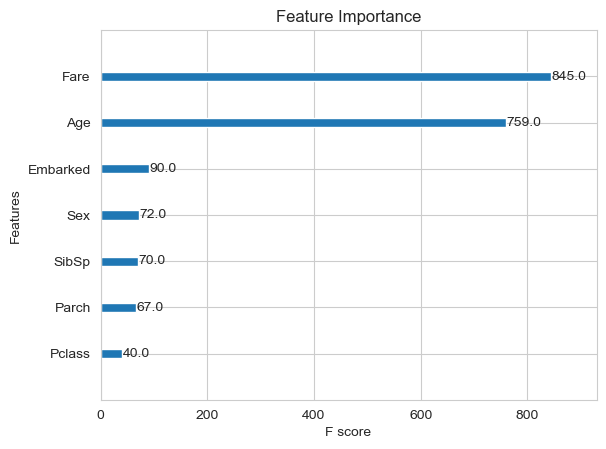

In [107]:
# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=7)
plt.title('Feature Importance')
plt.show()

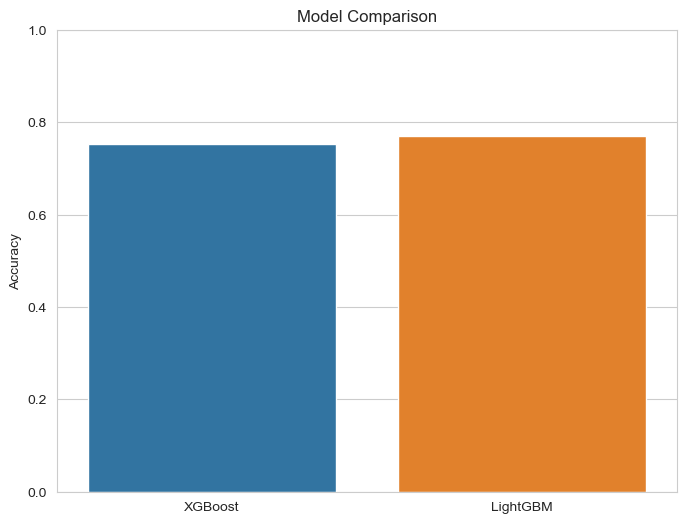

In [105]:
# Model Comparison
model_names = ['XGBoost', 'LightGBM']
accuracy_scores = [accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_lgb)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

### Cross-Validation and Hyperparameter Tuning

### Define the parameter grid for LightGBM

In [69]:
from sklearn.model_selection import GridSearchCV


lgb_param_grid = {
    'num_leaves': [25,31, 45,50,60],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [20, 40,70,85, 100]
}

In [77]:
# Initialize GridSearchCV for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
lgb_grid_search

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [20, 40, 70, 85, 100],
                         'num_leaves': [25, 31, 45, 50, 60]},
             scoring='accuracy', verbose=1)

In [71]:
# Fit the model
lgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [20, 40, 70, 85, 100],
                         'num_leaves': [25, 31, 45, 50, 60]},
             scoring='accuracy', verbose=1)

In [72]:
# Best parameters and score
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best Accuracy score for LightGBM:", lgb_grid_search.best_score_)

Best parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 40, 'num_leaves': 25}
Best Accuracy score for LightGBM: 0.7812622465254044


## Training new model with best parameters

In [78]:
lgb_model1 = lgb.LGBMClassifier(learning_rate= 0.2, max_depth= -1, n_estimators= 40, num_leaves= 25)

In [79]:
# Train the LightGBM model
lgb_model1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


LGBMClassifier(learning_rate=0.2, n_estimators=40, num_leaves=25)

In [80]:
# Make predictions
y_pred_lgb1 = lgb_model1.predict(X_test)

In [81]:
# Evaluate LightGBM model
print("LightGBM Model Performance:")
evaluate_model(y_test, y_pred_lgb1)

LightGBM Model Performance:
Accuracy: 0.7710
Precision: 0.5970
Recall: 0.5479
F1 Score: 0.5714


### Define the parameter grid for XGBoost

In [87]:

xgb_param_grid = {
    'max_depth': [3, 5, 7,10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200,250]
}

In [88]:
# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [89]:
# Fit the model
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_bin=None, max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=1)

In [90]:
# Best parameters and score
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best Accuracy score for XGBoost:", xgb_grid_search.best_score_)

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy score for XGBoost: 0.7879927090453406


## Training new model with best parameters

In [91]:
xgb_model1 = xgb.XGBClassifier(loss='log_loss',n_estimators=200,random_state=48,learning_rate= 0.01, max_depth= 3 )



In [92]:
# Train the XGBoost model
xgb_model1.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:05:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, loss='log_loss',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [93]:
y_pred_xgb1 = xgb_model1.predict(X_test)

In [94]:
# Evaluate XGBoost model
print("\nXGBoost Model Performance:")
evaluate_model(y_test, y_pred_xgb1)


XGBoost Model Performance:
Accuracy: 0.7901
Precision: 0.6957
Recall: 0.4384
F1 Score: 0.5378


In [ ]:
# After using grid search cv our Accuracy went from 75% to 80% in case of XG Boost